# HTL Aufnahmen, spectrum plots

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import librosa
from IPython.display import Audio 
import numpy as np

In [2]:
rootDir = '/media/root/Schnalz-F01/patrikStuff/AARIP/HTLAufnahme/selection/01'

In [3]:
files = os.listdir(rootDir)
print('found files:', files)
files = [os.path.join(rootDir,x) for x in files]
chanDesc = pd.read_csv(os.path.join(rootDir,'chanDescription.csv'),header=None)
chanDesc

found files: ['190403-T003_Tr8.WAV', '190403-T003_Tr5.WAV', '190403-T003_Tr6.WAV', '190403-T003_Tr7.WAV', 'chanDescription.csv']


,0,1
0,190403-T003_Tr5.WAV,bock
1,190403-T003_Tr6.WAV,fraes
2,190403-T003_Tr7.WAV,motor
3,190403-T003_Tr8.WAV,DPA


In [4]:
freqs = pd.read_csv('frequencies.csv')
freqs

,Element,Frequency[Hz]
0,Spindle Fan,43.3
1,Belts,55.0
2,Transfer Shaft,61.0
3,Belts,73.3
4,Transfer Shaft,81.6
5,Spindle Motor,100.0
6,Oil Pump,120.0
7,Spindle or Transmission Output Shaft,125.0
8,Spindle Motor,133.3
9,Spindle or Transmission Output Shaft,166.6


In [5]:
def plotTexts(xaxis='rpm', yval=0, textyRange= [0,10], maxX = 50_000):
    textyRange = np.linspace(textyRange[0],textyRange[1], len(freqs))
    for aRow,texty in zip(freqs.iterrows(),textyRange):
        frq = float(aRow[1][1])
        if xaxis=='rpm':
            frq *= 60 
        name = aRow[1][0]
        if frq<maxX:
            plt.annotate(name, xy=(frq, yval), xytext=(frq, texty),
                arrowprops=dict(facecolor='black', shrink=0.01,width=0.2))


In [6]:
x,sr = librosa.load(files[0],sr=None)

In [7]:
N = x.shape[0]
T = N/sr #sec
n = np.arange(N)
t = n/sr

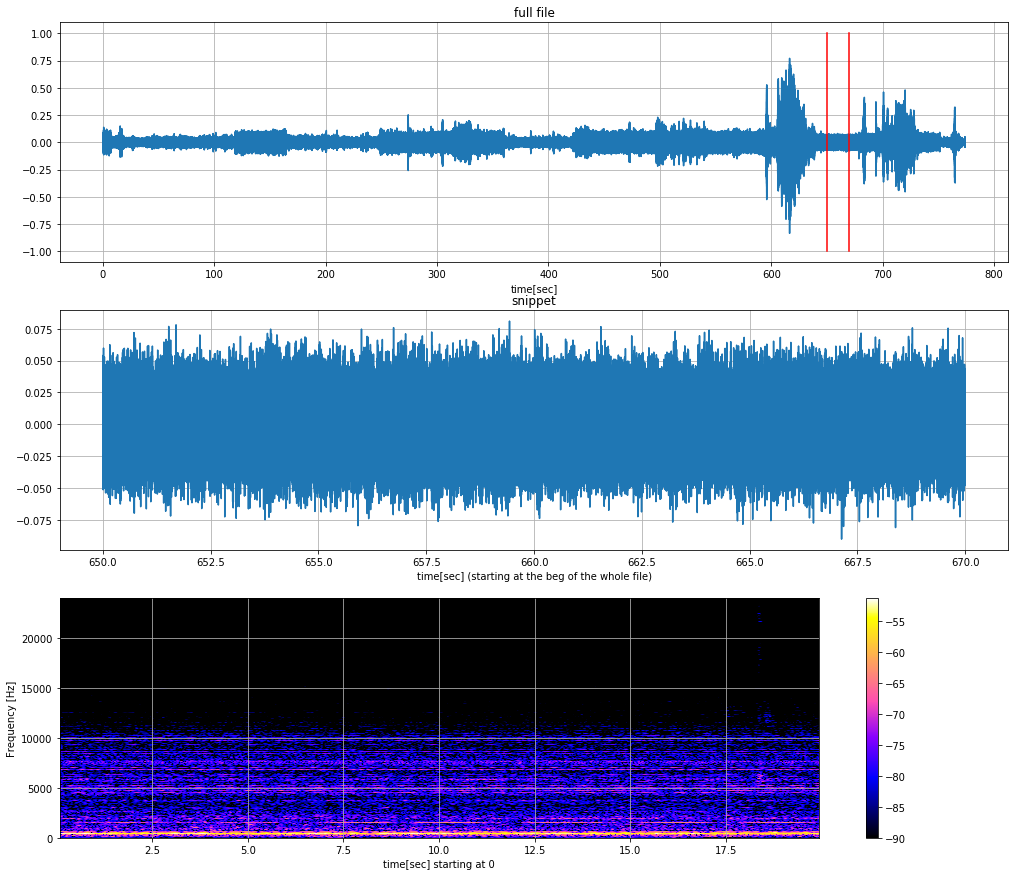

In [8]:
plt.figure(figsize=[17,15])
lengthS = 20
startS = 650
endS = startS+lengthS
startN = int(startS*sr)
endN = int(endS*sr)

plt.subplot(311)
plt.plot(t,x)
plt.plot([startS,startS],[-1,1],'r')
plt.plot([endS,endS],[-1,1],'r')
plt.title('full file')
plt.xlabel('time[sec]')
plt.grid()

plt.subplot(312)
plt.title('snippet')
snip = x[startN:endN]
plt.plot(t[startN:endN],snip)
plt.xlabel('time[sec] (starting at the beg of the whole file)')
plt.grid()


plt.subplot(313)
nfft = 2**13
overl = nfft-100
plt.specgram(snip, Fs=sr, cmap='gnuplot2', NFFT=nfft,noverlap=overl,vmin=-90)
plt.colorbar()
plt.xlabel('time[sec] starting at 0')
plt.ylabel('Frequency [Hz]')
plt.grid()

plt.show()

In [9]:
Audio(data=snip, rate=sr)

## Comparison to Spectrum Plot from Manual 
![alttext](manualSpectrum.png)

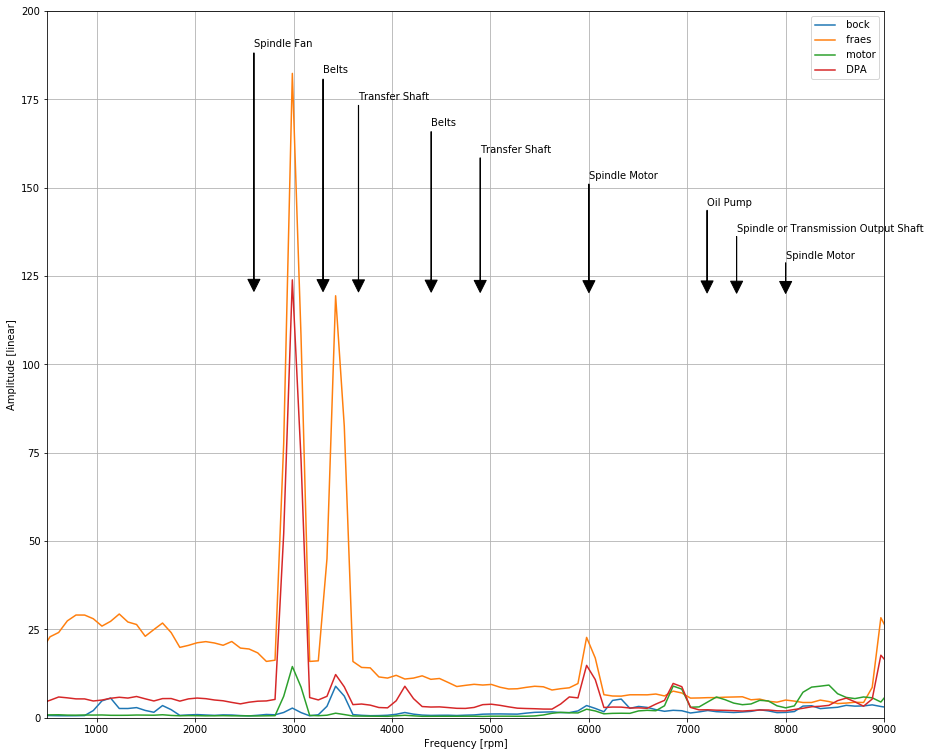

In [10]:
plt.figure(figsize=[15,13])
# ax = plt.subplot(111)
for i,f in enumerate(files):
    if '.wav' in f.lower():
        x,sr = librosa.load(f, sr=None, offset=startS, duration=endS-startS)
        spec = abs(librosa.stft(x,n_fft=2**15))
        spec = np.average(spec, axis=1)
        
        xAxis = np.linspace(0, sr/2, len(spec))*60 #rmp axis
        
        descr = chanDesc[1][i]
        plt.plot(xAxis,spec, label = descr)
        
plotTexts(yval = 120, textyRange=[190,100], maxX=9000)
plt.xlabel('Frequency [rpm]')
plt.ylabel('Amplitude [linear]')
plt.xlim([500,9000])
# plt.xlim([500,30_000])
plt.ylim([0,200])
plt.legend()
plt.grid()


#         plt.title(f)
plt.show()
    

## Linear RPM Plot in Range 500 - 31k RPM 
The spindle is supposed to run at 30k rpm (= 500Hz), the highest predicted fundamental

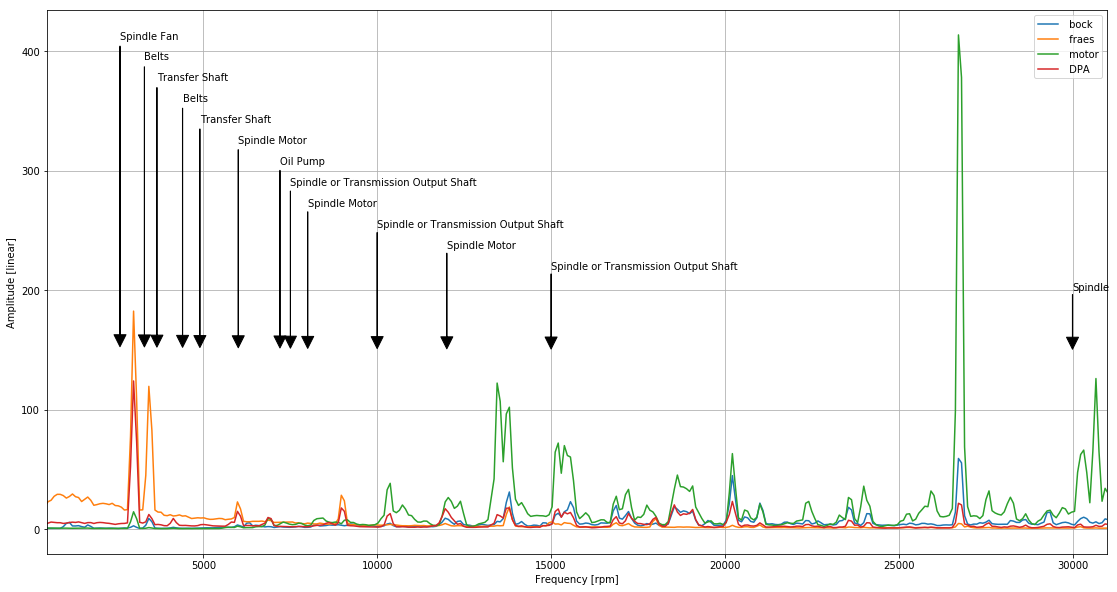

In [11]:
plt.figure(figsize=[19,10])
for i,f in enumerate(files):
    if '.wav' in f.lower():
        x,sr = librosa.load(f, sr=None, offset=startS, duration=endS-startS)
        spec = abs(librosa.stft(x,n_fft=2**15))
        spec = np.average(spec, axis=1)
        
        xAxis = np.linspace(0, sr/2, len(spec))*60 #rmp axis
        
        descr = chanDesc[1][i]
        plt.plot(xAxis,spec, label = descr)
        
plotTexts(yval = 150, textyRange = [410,200])
plt.xlabel('Frequency [rpm]')
plt.ylabel('Amplitude [linear]')
plt.xlim([500,31_000])
plt.legend()
plt.grid()
plt.show()
    

## Linear RPM Plot, fullrange

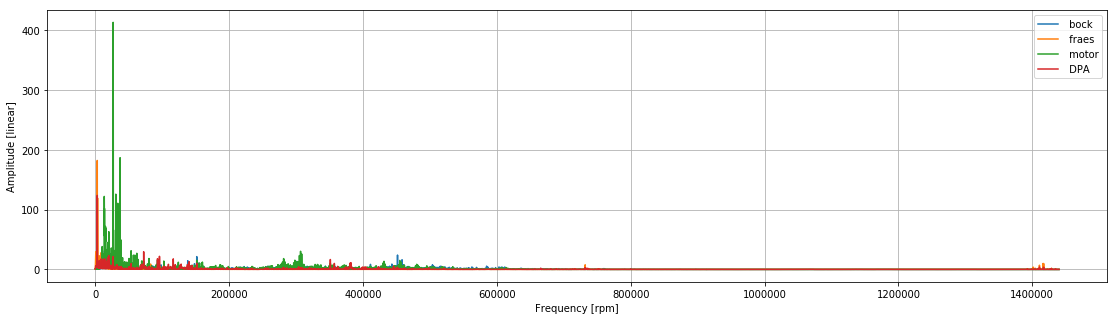

In [12]:
plt.figure(figsize=[19,5])
for i,f in enumerate(files):
    if '.wav' in f.lower():
        x,sr = librosa.load(f, sr=None, offset=startS, duration=endS-startS)
        spec = abs(librosa.stft(x,n_fft=2**15))
        spec = np.average(spec, axis=1)
#         spec = 20*np.log10(spec)
        
        xAxis = np.linspace(0, sr/2, len(spec))*60 #rmp axis
        
        descr = chanDesc[1][i]
        plt.plot(xAxis,spec, label = descr)
        

plt.xlabel('Frequency [rpm]')
plt.ylabel('Amplitude [linear]')
# plt.xlim([500,31_000])
plt.legend()
plt.grid()
#         plt.title(f)
plt.show()
    

## Traditional Audio Spectrum Plot (db and Log Herz Axis)

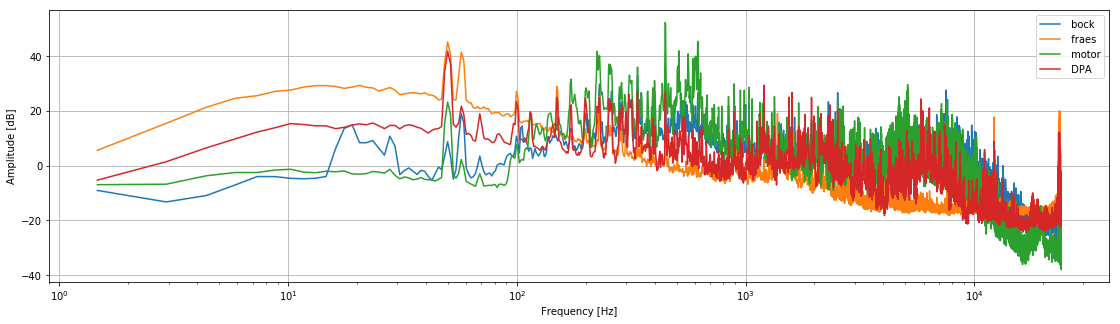

In [13]:
plt.figure(figsize=[19,5])
for i,f in enumerate(files):
    if '.wav' in f.lower():
        x,sr = librosa.load(f, sr=None, offset=startS, duration=endS-startS)
        spec = abs(librosa.stft(x,n_fft=2**15))
        spec = np.average(spec, axis=1)
        spec = 20*np.log10(spec)
        
        xAxis = np.linspace(0, sr/2, len(spec))#Hz axis
        
        descr = chanDesc[1][i]
        plt.semilogx(xAxis,spec, label = descr)
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')

plt.legend()

plt.show()
    